In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import kaepora as kpora
import kaepora_plot as kplot
import numpy as np
import spectral_analysis as sa

In [5]:
ssfr_all = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase and ((dm15_source >= .7 and dm15_source < 1.8) or (dm15_from_fits >= .7 and dm15_from_fits < 1.8))"

In [6]:
ssfr_array = kpora.grab(ssfr_all, multi_epoch = False, make_corr = True, verbose=True)


Using: ../data/kaepora_v1_DEV.db
3661 Total Spectra found
116 flagged spectra removed 3545 spectra left
82 spectra of peculiar Ias removed 3463 spectra left
281 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1989b sn1989b-19890427-o1i1.flm bsnip 56.3399611556 78.2981270419 47643.0 47564.512 0.002425 12.0 3346.0 8978.0
1990n sn1990n-19900731-oi.flm bsnip 246.978555483 21.4830649943 48103.193 48081.637 0.003395 13.0 3940.0 9816.0
1990o sn1990o-19900717-opt2.flm bsnip 67.146111096 12.5753882934 48089.0 48076.039 0.030664 11.0 3856.0 6818.0
1990y sn1990y-19900830-opt2.flm bsnip 5.49031052791 18.9579936749 48133.51 48113.812 0.039034 None 3844.0 6734.0
1991m sn1991m-19910407-final.flm bsnip 87.6428174913 17.8012082583 48353.0 48335.07 0.007235 14.0 3906.0 6898.0
1991s sn1991s-19910505-final.flm bsnip 0.0252803734457 31.8629659169 48381.0 48347.402 0.054453 19.0 3752.0 6588.0
1991t sn1991t-199204

2006or sn2006or-20061201.530-ui.flm bsnip 32.770383588 2.01074814914 54070.53 54068.477 0.021013 13.0 3294.0 9990.0
2006os sn2006os-20061201.142-ui.flm bsnip 20.3144995246 7.27433630032 54070.142 54062.629 0.032809 19.0 3258.0 10116.0
2006ot sn2006ot-20061201.241-ui.flm bsnip 12.9410415701 5.09543253252 54070.241 54064.875 0.0531 10.0 3192.0 9920.0
2006qo sn2006qo-20061201.436-ui.flm bsnip 31.4026898525 -10.9912611419 54070.436 54081.762 0.030455 15.0 3266.0 10138.0
2006s sn2006s-20060130.375-ui.flm bsnip 26.3049189109 -4.08777427037 53765.375 53769.594 0.032102 19.0 3280.0 10220.0
2006sr sn2006sr-20061220.097-ui.flm bsnip 69.4133466129 -2.54847970004 54089.097 54091.707 0.02414 19.0 3284.0 10202.0
2006td sn2006td-20070121.218-ui.flm bsnip 0.31141194741 22.33236209 54121.218 54098.531 0.01588 None 3388.0 10372.0
2006te sn2006te-20070121.393-ui.flm bsnip 0.304148018379 24.3429572932 54121.393 54096.281 0.031592 None 3278.0 10224.0
2006x sn2006x-20060626.243-ui.flm bsnip 0.195079175966 1

In [22]:
names = []
ssf = []
nssf = []
values = []
for i, spec in enumerate(ssfr_array):
    names.append(spec.name)
    if spec.other_meta_data["globalssfr"]:
        ssf.append(spec.name)
        values.append(spec.other_meta_data["globalssfr"])
    else:
        nssf.append(spec.name)
        
for n in nssf:
    print n
names = set(names)
print len(names)
print len(ssf), len(nssf)

1989b
1991m
1991t
1992g
1993ac
1993ae
1994d
1994s
1995ak
1995d
1995e
1996ai
1996bv
1997br
1997cw
1997e
1997y
1998bp
1998bu
1998dm
1998dx
1998ec
1998es
1998v
1999aa
1999ac
1999cl
1999cw
1999dk
1999ee
1999ek
1999gd
1999gh
2000bk
2000ce
2000fa
2001bf
2001c
2001cp
2001ep
2001fh
2001g
2001gc
2001n
2001v
2002ar
2002bo
2002cd
2002dj
2002do
2002er
2002eu
2002fb
2002hu
2002hw
2002jy
2002kf
2003ai
2003d
2003k
2003kf
2003w
2004bg
2004dt
2004eo
2004fu
2005a
2005am
2005bo
2005el
2005ew
2005ki
2005ls
2005m
2006ax
2006br
2006bu
2006cc
2006cm
2006cp
2006cz
2006em
2006et
2006eu
2006gj
2006ha
2006hb
2006kf
2006le
2006lf
2006mp
2006os
2006td
2006x
2007ap
2007au
2007bc
2007bm
2007bz
2007ca
2007cg
2007ci
2007cp
2007if
2007le
2007on
2007qe
2007s
2008c
1995bd
1996ab
1996bo
1996x
1996z
1997dt
1998co
1999ej
2000b
2000e
2002es
2003cg
2008r
2005al
2006fw
2007ai
2007as
2007jh
2008bc
2008fp
1980n
1986g
1992a
asassn-14lp
2011iv
281
147 134


-10.69


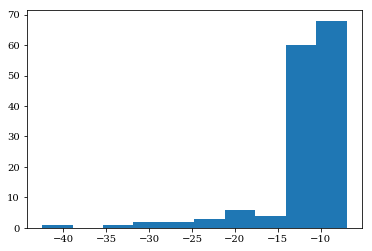

In [24]:
print np.median(values)
plt.hist(values)
plt.show()

In [39]:
ssfr_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= .9 and dm15_from_fits < 1.3)) and globalssfr < -10.7",
              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and globalssfr > -10.7"]


In [42]:
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(ssfr_query, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= .9 and dm15_from_fits < 1.3)) and globalssfr < -10.7
69 Total Spectra found
3 flagged spectra removed 66 spectra left
0 spectra of peculiar Ias removed 66 spectra left
66 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
30 total SNe
removed spectra of SNe with A_V > 2.0
Using 66 spectra of 30 SNe
Gini balancing...
Balanced after 16 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and globalssfr > -10.7
95 Total Spectra found
4 flagged spectra removed 91 spectra left
0 spectra of peculiar Ias removed 91 spectra left
80 s

In [43]:
# for spec in sn_arrays[0]:
#     print spec.name

Phase:  0.5517048808359194
dm15:  1.118956855671634
Redshift:  0.021031685364066306
HR:  -0.05905463316695456
Phase:  0.3768075748927907
dm15:  1.1017327481949855
Redshift:  0.012636850083638395
HR:  nan


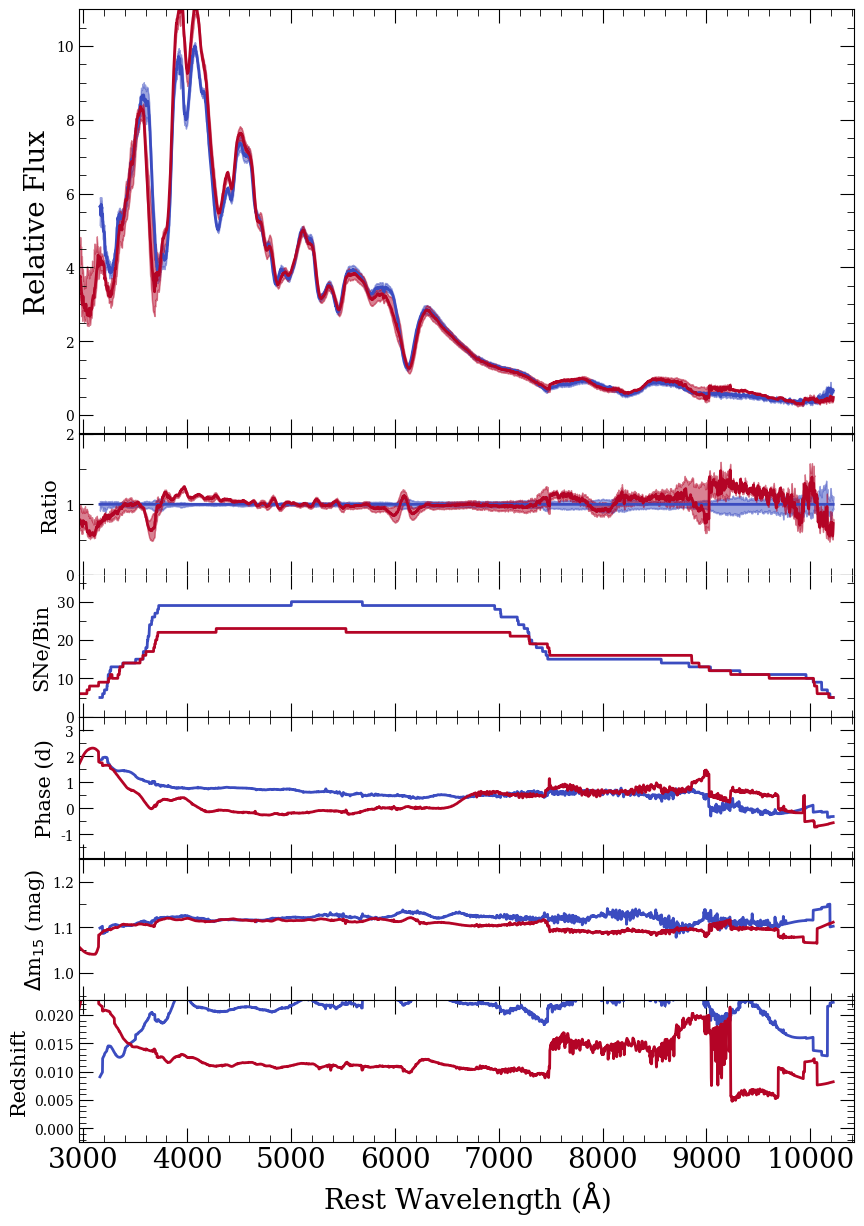

In [44]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)